<a href="https://colab.research.google.com/github/sanika1333/ML_DIGIT-RECOGNIZATION/blob/main/digit_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tensorflow as tf #

In [33]:
mnist=tf.keras.datasets.mnist

In [34]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() #unpacking data into train and test datasets

11490434/11490434 [==============================] - 0s 0us/step


In [35]:
x_train.shape

(60000, 28, 28)

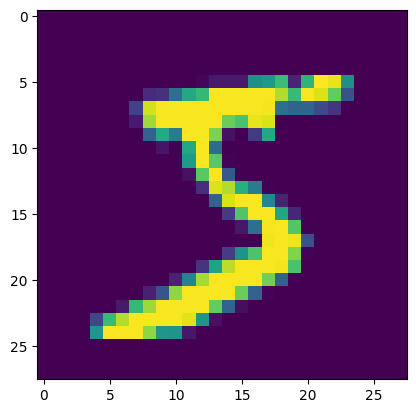

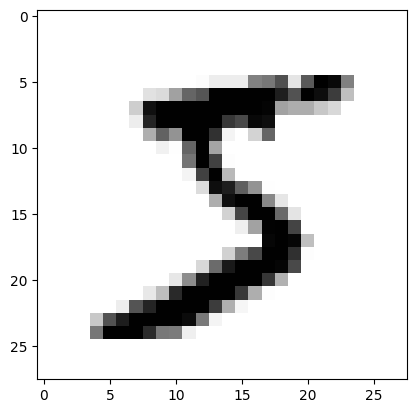

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [37]:
#checking value of each pixel
#normalisation

In [38]:
print(x_train[0])#before normalisation

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

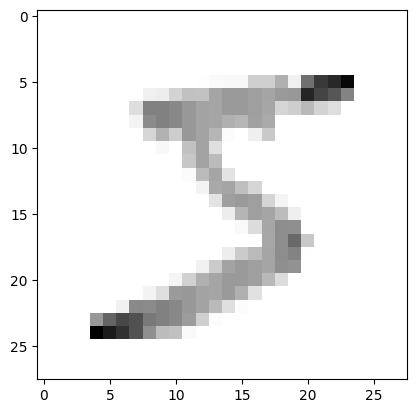

In [39]:
#normalising the data ;;preprosseing the data
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_train,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [40]:
#after normalization
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [41]:
print (y_train[0])

5


In [42]:
#resize image to apply convolution operation
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("training samples dimensions",x_trainr.shape)
print("testing samples dimensions",x_testr.shape)

training samples dimensions (60000, 28, 28, 1)
testing samples dimensions (60000, 28, 28, 1)


In [43]:
#creating deep neural network;;trainig on 6000 samples of mnist handwritten dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [44]:
#CREATING NEURAL NETWORK
model=Sequential()
##first convolusion layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))#1ST  C layer
model.add(Activation("relu"))#activation function TO MAKE IT NON LINIEAR ,<0,REMOVE WHEN LESS THAN ZERO
model.add(MaxPooling2D(pool_size=(2,2)))#max pooling

In [45]:
##SECOND convolusion layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))#2ND  C layer
model.add(Activation("relu"))#activation function TO MAKE IT NON LINIEAR ,<0,REMOVE WHEN LESS THAN ZERO
model.add(MaxPooling2D(pool_size=(2,2)))#max pooling

In [46]:
#THIRD convolusion layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))#3RD C layer
model.add(Activation("relu"))#activation function TO MAKE IT NON LINIEAR ,<0,REMOVE WHEN LESS THAN ZERO
model.add(MaxPooling2D(pool_size=(2,2)))#max pooling

In [47]:


#FULLY CONNECTED LAYER
model.add(Flatten())#before fully connected layer , need to be flatten t oconvert 2d to 1d
model.add(Dense(64))#
model.add(Activation("relu"))

In [48]:
model.add(Dense(32))#
model.add(Activation("relu"))

In [49]:
model.add(Dense(10))#lat dense layer must b equal to 10
model.add(Activation("softmax"))#class probabilities and classification

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [51]:
print("total trainig samples = ",len(x_trainr))

total trainig samples =  60000


In [52]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])#compile model


In [81]:
model.fit(x_trainr,y_train,epochs=5, validation_split=0.3)#training my model

Epoch 1/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.0695 - val_accuracy: 0.9791
Epoch 2/5
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0331 - accuracy: 0.9886 - val_loss: 0.0848 - val_accuracy: 0.9770
Epoch 3/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0740 - val_accuracy: 0.9803
Epoch 4/5
1313/1313 [==============================] - 65s 50ms/step - loss: 0.0237 - accuracy: 0.9919 - val_loss: 0.0679 - val_accuracy: 0.9819
Epoch 5/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0633 - val_accuracy: 0.9838


In [54]:



##evaluationg on resting fdataset mnist


In [55]:
#predictions=newmodel.predict([x_test]) there is specialized method for efficiently saving the model

predictions=model.predict([x_test])

1875/1875 [==============================] - 27s 14ms/step


In [56]:
print(predictions)

[[6.76644504e-07 1.72044849e-06 3.46312686e-06 ... 6.41808947e-05
  6.31274132e-04 1.22304391e-05]
 [9.99959052e-01 6.33661898e-07 3.79323933e-06 ... 3.11942131e-06
  3.30069406e-06 1.83325101e-05]
 [2.27653985e-09 9.81881954e-07 4.71313427e-07 ... 1.08015111e-05
  1.23077328e-07 3.39684846e-07]
 ...
 [9.24310552e-06 3.46360002e-06 6.18204467e-07 ... 2.29924135e-05
  3.52838746e-04 1.58834236e-03]
 [7.81235402e-04 8.13282168e-06 1.29287891e-05 ... 1.12777755e-07
  1.08238841e-04 6.68955772e-06]
 [2.11977795e-06 4.65197765e-08 1.16988478e-04 ... 4.98464833e-05
  9.99717951e-01 5.54678372e-05]]


In [57]:
#convert prediction from one hot encoding , uusing numpy
print(np.argmax(predictions[0]))


5


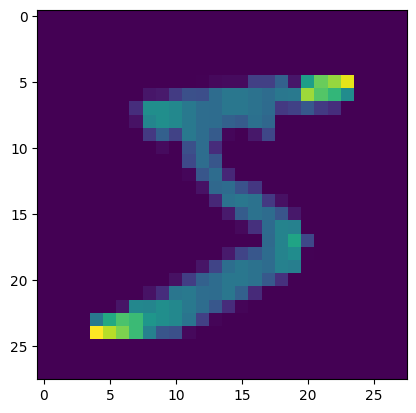

In [63]:
#check whether our ans is correct or not
plt.imshow(x_test[0])

In [64]:
print(np.argmax(predictions[123]))

7


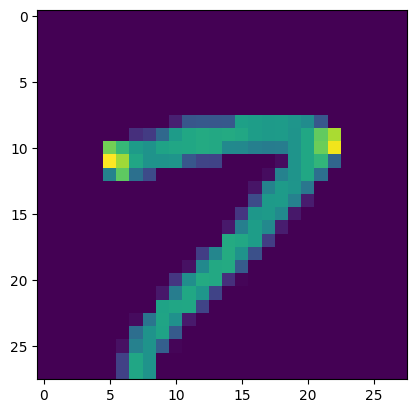

In [65]:
plt.imshow(x_test[123])

In [66]:
import cv2


In [67]:
img=cv2.imread('/content/5.dataset.png')



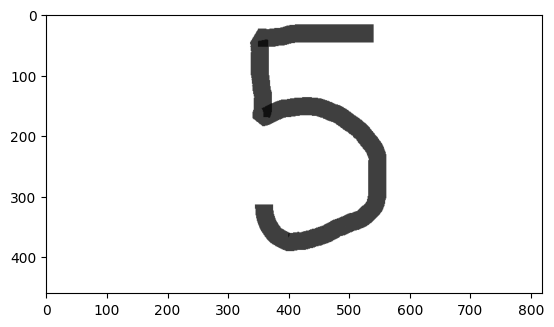

In [68]:
plt.imshow(img)


In [69]:
img.shape

(460, 819, 3)

In [70]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [71]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [72]:
gray.shape

(460, 819)

In [73]:
resized.shape

(28, 28)

In [74]:
newimg=tf.keras.utils.normalize(resized,axis=1)#0to 1  scaling

In [75]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)#kernel operation of convolution layer

In [76]:
newimg.shape

(1, 28, 28, 1)

In [79]:
predictions=model.predict(newimg)


1/1 [==============================] - 0s 23ms/step


In [80]:
print(np.argmax(predictions))

0
